In [35]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [2]:
feat_file=pd.read_csv('cancer_mordred_preprocessed.csv')

In [3]:
feat_file.head()

,ABC,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE2_A,VR1_A,VR3_A,...,JGI9,JGI10,JGT10,Diameter,TopoShapeIndex,SRW03,SRW05,TSRW10,WPath,mZagreb1
0,0.121378,0.0,0.0,0.165387,0.722883,0.785705,0.625380,0.172377,0.000007,0.325947,...,0.000000,0.000000,0.570573,8.000000e-08,0.60,0.0,0.000000,0.255696,1.210999e-09,0.142857
1,0.187982,0.2,0.2,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.460767,0.614607,0.593865,1.000000e+00,0.00,0.0,0.555084,0.412322,1.242729e-02,0.133016
2,0.161982,0.0,0.0,0.232151,0.766968,0.882304,0.685177,0.152569,0.000011,0.359675,...,0.000000,0.000000,0.431425,8.000000e-08,1.00,0.0,0.000000,0.335127,1.919619e-09,0.125236
3,0.150052,0.1,0.0,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.000000,0.000000,0.502729,1.000000e+00,0.00,0.0,0.437189,0.361216,1.586462e-02,0.153556
4,0.073037,0.0,0.0,0.115319,0.672574,0.876552,0.525463,0.248485,0.000004,0.264019,...,0.000000,0.000000,0.267857,7.000000e-08,0.75,0.0,0.000000,0.204382,3.516658e-10,0.053493


In [4]:
feat_file.shape

(2129, 820)

In [9]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [11]:
X_train.shape

(1703, 820)

# boruta

In [12]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)


In [13]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_train_filtered = feat_selector.transform(X_train)
X_test_filtered = feat_selector.transform(X_test)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	9 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	10 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	11 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	12 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	13 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	14 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	15 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	16 / 100
Conf

In [14]:
X_train_filtered.shape

(1703, 129)

In [15]:
y_train.shape

(1703,)

In [16]:
selected_feat_indices = np.where(feat_selector.support_ == True)[0]

In [17]:
selected_feat_indices

array([  2,   3,   6,   8,  14,  28,  30,  32,  33,  34,  35,  44,  47,
        61,  72,  73,  87,  88,  89,  90,  97,  99, 100, 106, 107, 117,
       131, 132, 139, 140, 147, 148, 155, 156, 157, 158, 161, 165, 166,
       168, 171, 172, 175, 176, 177, 185, 194, 211, 212, 221, 228, 229,
       232, 238, 247, 250, 257, 264, 300, 303, 305, 313, 331, 334, 343,
       351, 355, 358, 367, 370, 375, 379, 382, 383, 384, 399, 400, 401,
       403, 404, 405, 406, 407, 409, 410, 411, 415, 416, 417, 418, 429,
       457, 459, 461, 462, 464, 467, 469, 471, 474, 481, 529, 558, 565,
       567, 598, 601, 605, 611, 612, 615, 626, 634, 654, 655, 656, 658,
       659, 662, 666, 683, 684, 704, 705, 707, 726, 732, 795, 797])

In [18]:
selected_feat_names = list(feat_file.columns[selected_feat_indices])

In [19]:
selected_feat_names

['nBase',
 'SpAbs_A',
 'LogEE_A',
 'VR1_A',
 'nH',
 'ATS0s',
 'ATS2s',
 'ATS0Z',
 'ATS1Z',
 'ATS3Z',
 'ATS0p',
 'AATS8dv',
 'AATS3d',
 'AATS8s',
 'AATS1v',
 'AATS3v',
 'AATS8se',
 'AATS0p',
 'AATS1p',
 'AATS2p',
 'AATS0i',
 'AATS2i',
 'AATS3i',
 'ATSC0c',
 'ATSC1c',
 'ATSC3dv',
 'ATSC1s',
 'ATSC2s',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC0v',
 'ATSC1v',
 'ATSC8v',
 'ATSC0se',
 'ATSC1se',
 'ATSC2se',
 'ATSC5se',
 'ATSC0pe',
 'ATSC1pe',
 'ATSC5pe',
 'ATSC1p',
 'ATSC2p',
 'ATSC0i',
 'ATSC1i',
 'ATSC2i',
 'AATSC1c',
 'AATSC1dv',
 'AATSC1s',
 'AATSC2s',
 'AATSC2Z',
 'AATSC0v',
 'AATSC1v',
 'AATSC4v',
 'AATSC1se',
 'AATSC1pe',
 'AATSC1p',
 'AATSC0i',
 'AATSC7i',
 'MATS1v',
 'MATS4v',
 'MATS1se',
 'MATS1p',
 'GATS5c',
 'GATS8c',
 'GATS1d',
 'GATS1s',
 'GATS5s',
 'GATS8s',
 'GATS1v',
 'GATS4v',
 'GATS1se',
 'GATS5se',
 'GATS8se',
 'GATS1p',
 'GATS2p',
 'BCUTc-1h',
 'BCUTc-1l',
 'BCUTdv-1h',
 'BCUTd-1h',
 'BCUTd-1l',
 'BCUTs-1h',
 'BCUTs-1l',
 'BCUTZ-1h',
 'BCUTv-1h',
 'BCUTv-1l',
 'BCUTse-1h',
 'BCUTp-1h

In [20]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [21]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [22]:
new_df=train_x.loc[:,selected_feat_names]
X_train_filtered=new_df

new_df_test=test_x.loc[:,selected_feat_names]
X_test_filtered=new_df_test

In [23]:
new_df

,nBase,SpAbs_A,LogEE_A,VR1_A,nH,ATS0s,ATS2s,ATS0Z,ATS1Z,ATS3Z,...,PEOE_VSA5,SlogP_VSA2,SlogP_VSA3,VSA_EState4,VSA_EState5,VSA_EState8,MDEN-23,AMID_N,nRot,SLogP
0,0.0,0.263309,0.722400,0.000014,0.205479,0.131006,0.153579,0.070010,0.153974,0.188376,...,0.000000,0.031557,0.049716,0.221750,0.886260,0.370737,0.132781,0.000000,0.026316,0.807984
1,0.0,0.253215,0.701293,0.000012,0.075342,0.138247,0.152795,0.063762,0.131347,0.128318,...,0.000000,0.013529,0.000000,0.170647,0.834768,0.235943,0.132781,0.078168,0.026316,0.813557
2,0.1,0.084394,0.491191,0.000002,0.102740,0.077548,0.073396,0.029478,0.054498,0.038542,...,0.000000,0.096536,0.000000,0.166219,0.834768,0.327207,0.132781,0.174246,0.105263,0.717269
3,0.0,0.099905,0.506566,0.000003,0.047945,0.074735,0.056255,0.026594,0.051600,0.038851,...,0.000000,0.000168,0.000000,0.182802,0.834768,0.306338,0.132781,0.188587,0.026316,0.744645
4,0.0,0.183974,0.605608,0.001804,0.123288,0.118358,0.124571,0.213153,0.143212,0.105874,...,0.000000,0.189990,0.284925,0.166219,0.834768,0.235943,0.132781,0.155704,0.000000,0.747574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,0.0,0.121095,0.578691,0.000004,0.109589,0.063946,0.066689,0.032041,0.071192,0.066868,...,0.000000,0.015862,0.024858,0.179201,0.871338,0.370041,0.132781,0.000000,0.026316,0.766450
1699,0.0,0.258094,0.712700,0.000014,0.178082,0.115790,0.150063,0.069048,0.149558,0.173129,...,0.000000,0.080308,0.057849,0.242083,0.865627,0.281937,0.132781,0.000000,0.026316,0.782898
1700,0.4,0.183974,0.605608,0.001804,0.164384,0.118358,0.124571,0.323134,0.544426,0.448727,...,0.220424,0.207270,0.209837,0.448217,0.805318,0.235943,0.132781,0.155704,0.289474,0.605741
1701,0.0,0.071825,0.432382,0.000001,0.054795,0.011337,0.017873,0.075777,0.067881,0.060367,...,0.250000,0.063306,0.000000,0.166219,0.889847,0.235943,0.132781,0.000000,0.105263,0.765433


In [24]:
X_train_filtered.to_csv('X_train_filtered_boruta_mordred_names.csv',index=False)
X_test_filtered.to_csv('X_test_filtered_boruta_mordred_names.csv',index=False)

In [25]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [26]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [28]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [29]:
data

,Clustering_scores,Scores
0,silhouette_score,0.007695
1,adjusted_rand_score,0.005328
2,normalized_mutual_info_score,0.004822


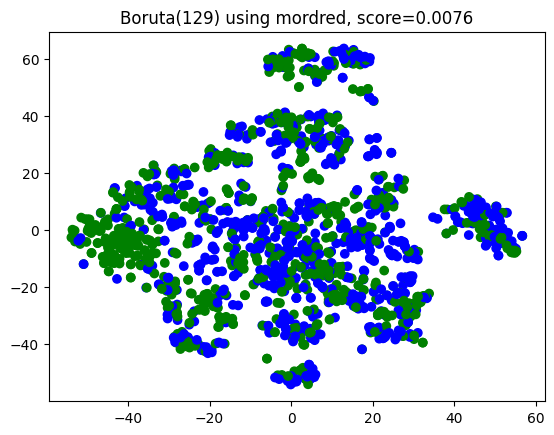

In [30]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('Boruta(129) using mordred, score=0.0076')
plt.show()

## RFC

In [36]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [37]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[148  51]
 [ 99 128]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5992    0.7437    0.6637       199
           1     0.7151    0.5639    0.6305       227

    accuracy                         0.6479       426
   macro avg     0.6571    0.6538    0.6471       426
weighted avg     0.6609    0.6479    0.6460       426



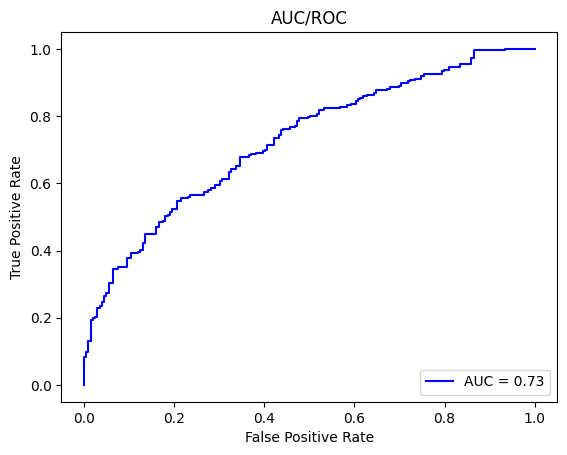

In [38]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [40]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 78 149]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6232    0.6482    0.6355       199
           1     0.6804    0.6564    0.6682       227

    accuracy                         0.6526       426
   macro avg     0.6518    0.6523    0.6518       426
weighted avg     0.6537    0.6526    0.6529       426



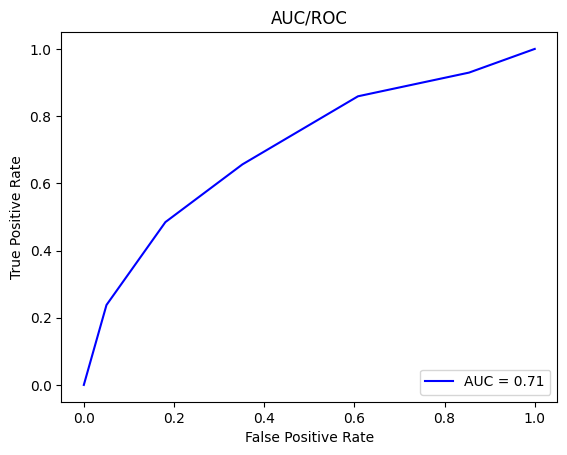

In [41]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [42]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [43]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[117  82]
 [ 67 160]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6359    0.5879    0.6110       199
           1     0.6612    0.7048    0.6823       227

    accuracy                         0.6502       426
   macro avg     0.6485    0.6464    0.6466       426
weighted avg     0.6493    0.6502    0.6490       426



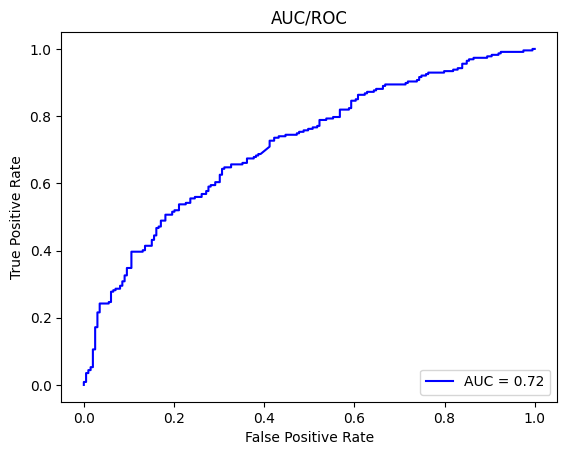

In [44]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[124  75]
 [ 71 156]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6359    0.6231    0.6294       199
           1     0.6753    0.6872    0.6812       227

    accuracy                         0.6573       426
   macro avg     0.6556    0.6552    0.6553       426
weighted avg     0.6569    0.6573    0.6570       426



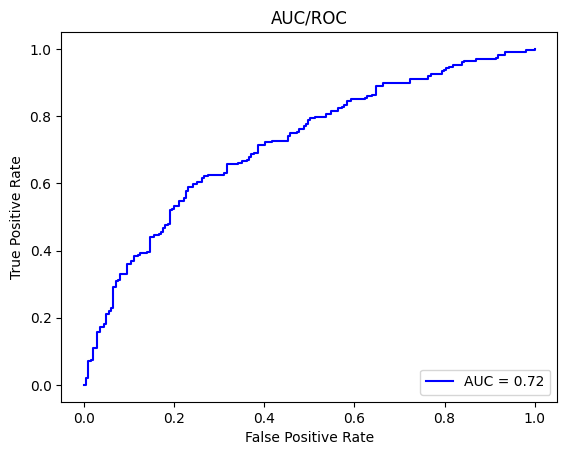

In [47]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[19:39:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [49]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[142  57]
 [ 68 159]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6762    0.7136    0.6944       199
           1     0.7361    0.7004    0.7178       227

    accuracy                         0.7066       426
   macro avg     0.7062    0.7070    0.7061       426
weighted avg     0.7081    0.7066    0.7069       426



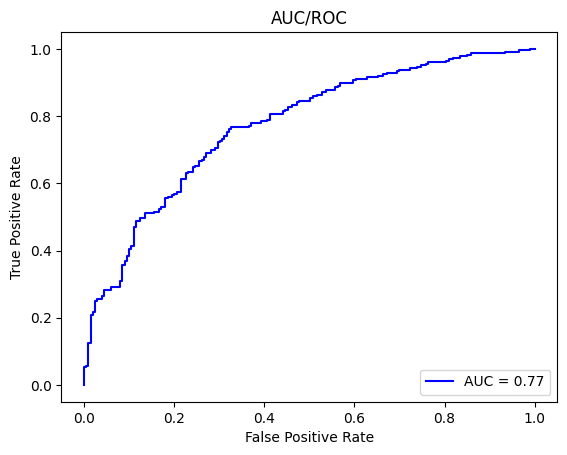

In [50]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [52]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 93 106]
 [ 52 175]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6414    0.4673    0.5407       199
           1     0.6228    0.7709    0.6890       227

    accuracy                         0.6291       426
   macro avg     0.6321    0.6191    0.6148       426
weighted avg     0.6315    0.6291    0.6197       426



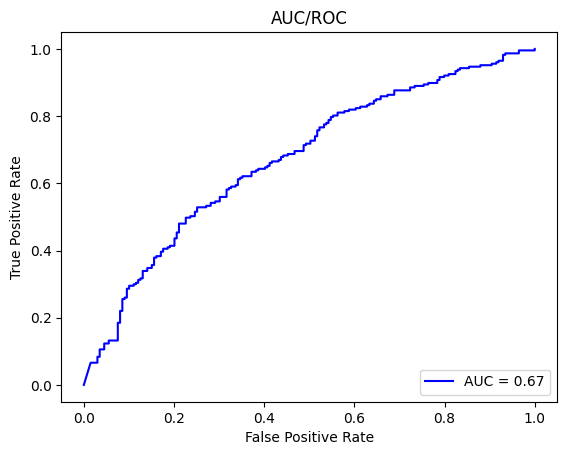

In [53]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [55]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[151  48]
 [ 84 143]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6426    0.7588    0.6959       199
           1     0.7487    0.6300    0.6842       227

    accuracy                         0.6901       426
   macro avg     0.6956    0.6944    0.6900       426
weighted avg     0.6991    0.6901    0.6896       426



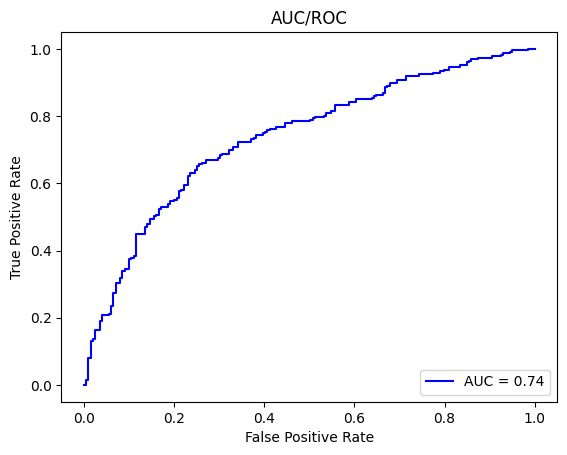

In [56]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [58]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[142  57]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6514    0.7136    0.6811       199
           1     0.7260    0.6652    0.6943       227

    accuracy                         0.6878       426
   macro avg     0.6887    0.6894    0.6877       426
weighted avg     0.6911    0.6878    0.6881       426



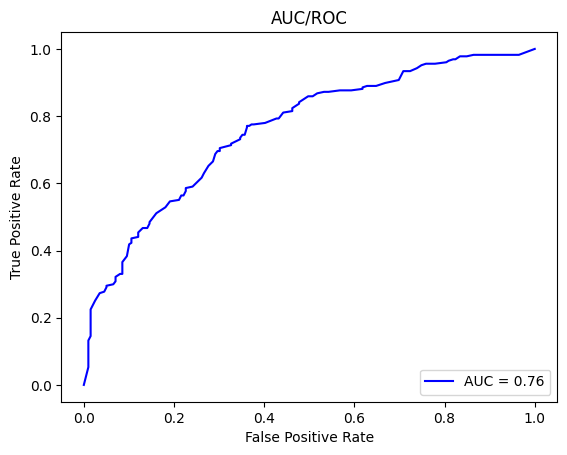

In [59]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [60]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [61]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[102  97]
 [ 63 164]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6182    0.5126    0.5604       199
           1     0.6284    0.7225    0.6721       227

    accuracy                         0.6244       426
   macro avg     0.6233    0.6175    0.6163       426
weighted avg     0.6236    0.6244    0.6200       426



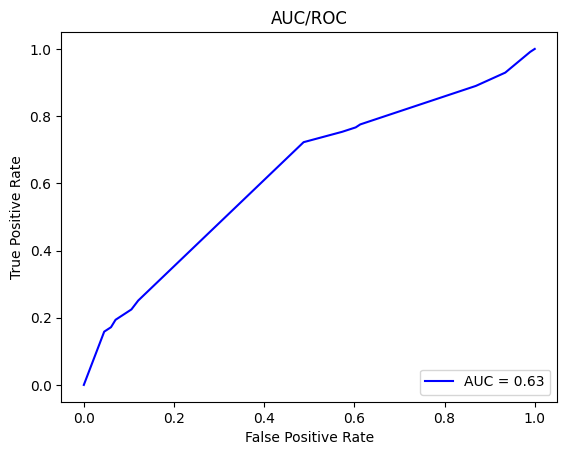

In [62]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [64]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[124  75]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6263    0.6231    0.6247       199
           1     0.6711    0.6740    0.6725       227

    accuracy                         0.6502       426
   macro avg     0.6487    0.6486    0.6486       426
weighted avg     0.6501    0.6502    0.6502       426



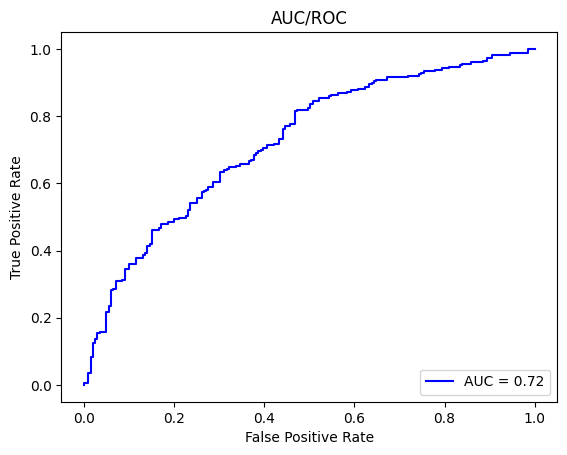

In [65]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [66]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [67]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [68]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,80.211392,0.609166,0.801969,0.846154,0.752566,0.605221,0.895842
1,KNN,78.919554,0.578061,0.789028,0.796339,0.793615,0.578057,0.875724
2,SVC,68.702290,0.373680,0.684769,0.677320,0.749145,0.371426,0.753911
3,LR,68.878450,0.376549,0.687893,0.689204,0.720639,0.376132,0.758716
4,XGB,99.588961,0.991772,0.995886,0.995444,0.996579,0.991772,0.999776
5,GNB,61.949501,0.245128,0.603988,0.598452,0.793615,0.230560,0.688667
6,MLP,76.335878,0.534559,0.762861,0.816845,0.696693,0.528434,0.867080
7,ETC,99.765120,0.995298,0.997649,0.997719,0.997719,0.995298,0.999986
8,DTC,69.876688,0.402808,0.692869,0.671375,0.812999,0.393040,0.767713
9,LDA,71.227246,0.423758,0.711799,0.716201,0.730901,0.423663,0.796898


In [69]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,64.788732,0.310917,0.647110,0.715084,0.563877,0.303086,0.726097
1,KNN,65.258216,0.304091,0.651815,0.680365,0.656388,0.303875,0.705621
2,SVC,65.023474,0.294898,0.646634,0.661157,0.704846,0.294153,0.715029
3,LR,65.727700,0.310781,0.655332,0.675325,0.687225,0.310725,0.717885
4,XGB,70.657277,0.413154,0.706105,0.736111,0.700441,0.412602,0.771545
5,GNB,62.910798,0.250875,0.614837,0.622776,0.770925,0.242317,0.672758
6,MLP,69.014085,0.389995,0.690032,0.748691,0.629956,0.384460,0.736148
7,ETC,68.779343,0.378051,0.687654,0.725962,0.665198,0.376549,0.759834
8,DTC,62.441315,0.240713,0.616285,0.628352,0.722467,0.237533,0.627023
9,LDA,65.023474,0.297220,0.648606,0.671053,0.674009,0.297217,0.722445
